<center><h1>Breast Cancer Prediction<h1><center>

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# 1. Data Collection

In [64]:
data = pd.read_csv("BreastCancer.csv")

In [6]:
print(data.shape)

(699, 10)


In [65]:
data.head()

,Cl_thickness,Cell_size,Cell_shape,Marg_adhesion,Epith_c_size,Bare_nuclei,Bl_cromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


# 2. Data Exploration

In [7]:
data.dtypes

Cl_thickness         int64
Cell_size            int64
Cell_shape           int64
Marg_adhesion        int64
Epith_c_size         int64
Bare_nuclei        float64
Bl_cromatin          int64
Normal_nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

### Attributes
* Clump Thickness
* Uniformity of Cell Size
* Uniformity of Cell Shape
* Marginal Adhesion
* Single Epithelial Cell Size
* Bare Nuclei
* Bland Chromatin
* Normal Nucleoli
* Mitoses
* Class (0=No, 1=Yes)

In [8]:
data.isna().sum()

Cl_thickness        0
Cell_size           0
Cell_shape          0
Marg_adhesion       0
Epith_c_size        0
Bare_nuclei        16
Bl_cromatin         0
Normal_nucleoli     0
Mitoses             0
Class               0
dtype: int64

### Imputing Missing Values

In [9]:
data['Bare_nuclei'].fillna(data['Bare_nuclei'].median(), inplace=True)

In [10]:
data.isna().sum()

Cl_thickness       0
Cell_size          0
Cell_shape         0
Marg_adhesion      0
Epith_c_size       0
Bare_nuclei        0
Bl_cromatin        0
Normal_nucleoli    0
Mitoses            0
Class              0
dtype: int64

### Data Distribution Analysis

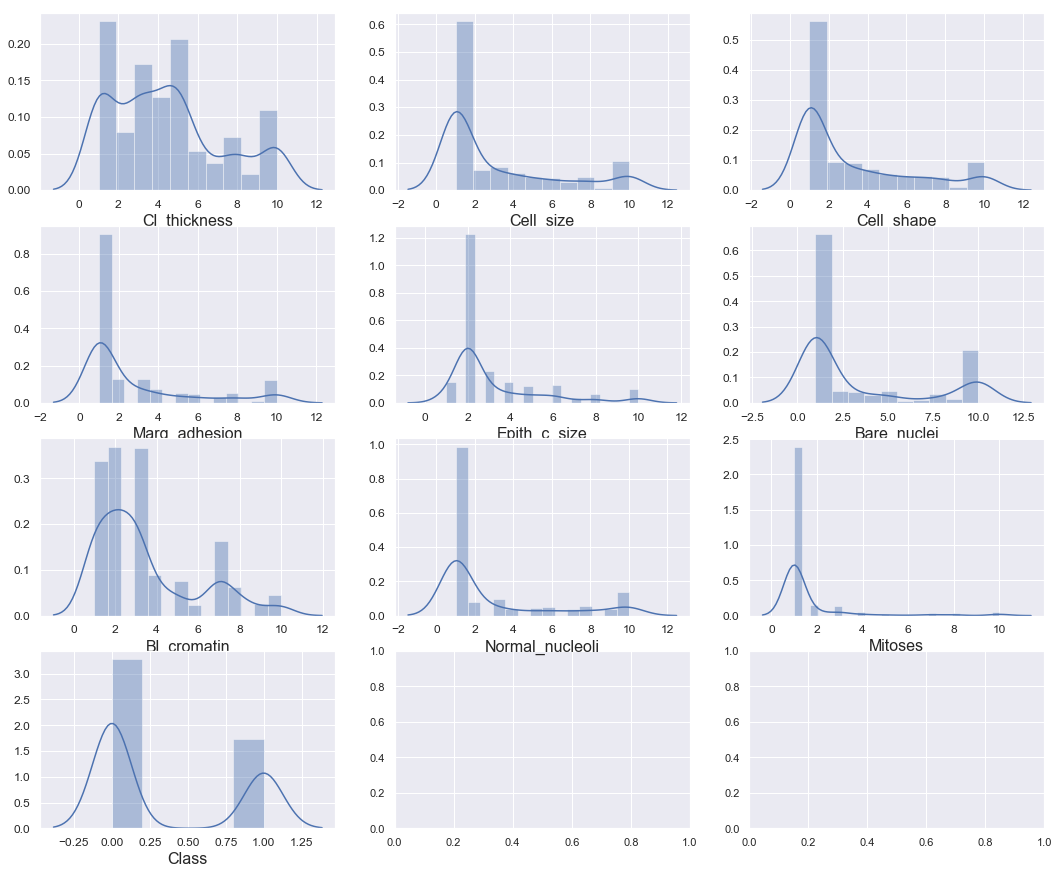

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(data, data.columns);

### Outlier Analysis

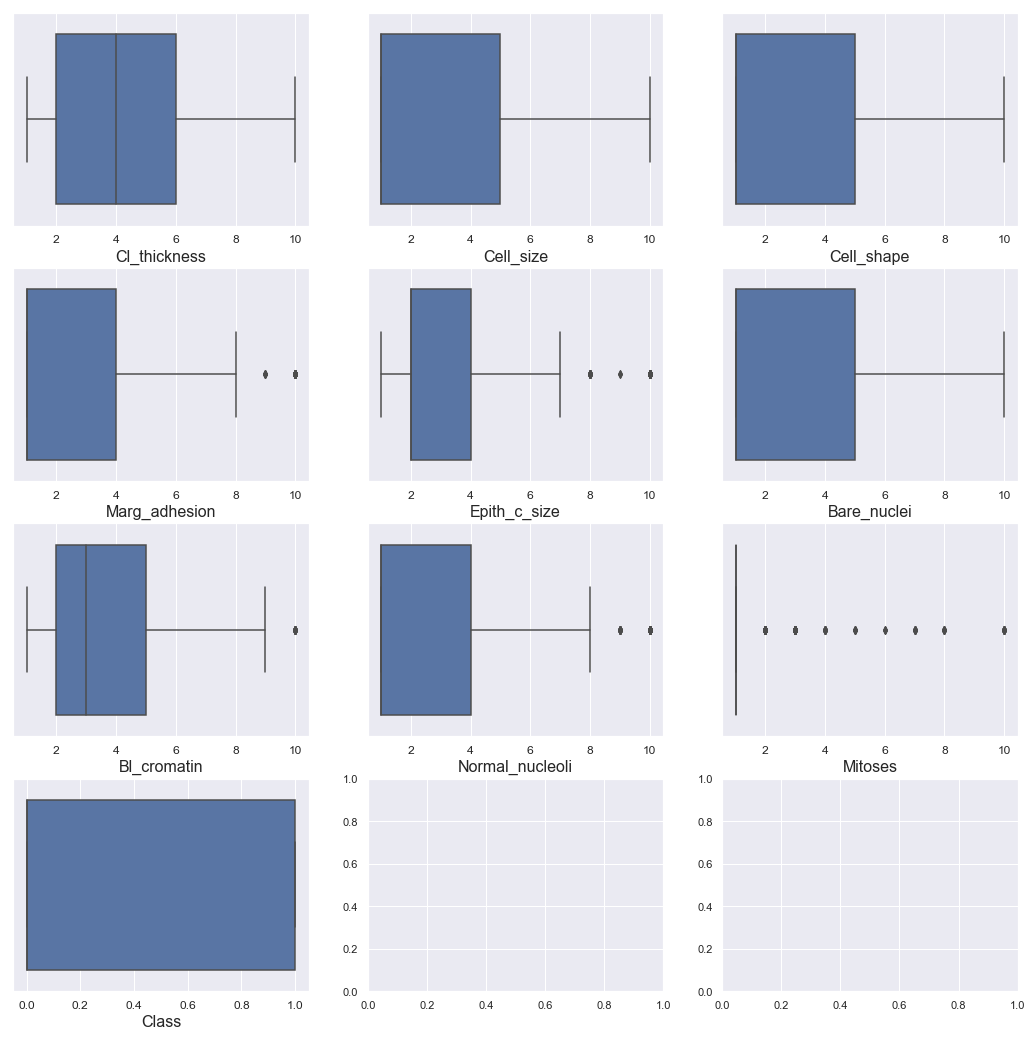

In [14]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,18))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(data, data.columns)

### Correlation Matrix

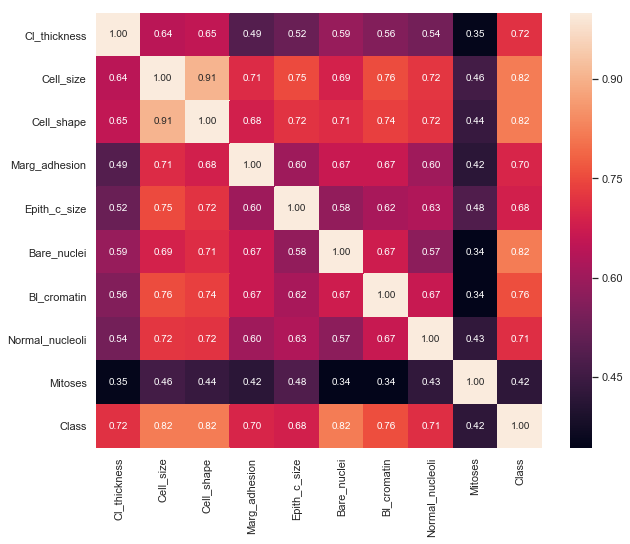

In [15]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f");

# 3. Data Preprocessing

In [17]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [19]:
for col in data.columns:
    print(col,'-->', detect_outlier(data[col]))

Cl_thickness --> []
Cell_size --> []
Cell_shape --> []
Marg_adhesion --> [14, 20, 38, 40, 73, 99, 104, 107, 112, 117, 132, 167, 173, 187, 188, 191, 205, 210, 213, 214, 251, 260, 263, 264, 282, 284, 285, 286, 304, 312, 323, 348, 353, 360, 361, 366, 367, 425, 440, 479, 482, 487, 488, 493, 494, 506, 514, 523, 546, 565, 569, 586, 588, 608, 610, 611, 612, 648, 680, 681]
Epith_c_size --> [32, 42, 43, 44, 53, 54, 62, 67, 71, 84, 85, 98, 100, 104, 107, 113, 122, 123, 124, 129, 132, 148, 149, 166, 173, 175, 177, 191, 201, 221, 229, 236, 253, 254, 261, 264, 285, 286, 302, 312, 344, 357, 358, 360, 366, 412, 416, 421, 425, 482, 570, 608, 648, 657]
Bare_nuclei --> []
Bl_cromatin --> [173, 214, 261, 285, 425, 440, 453, 457, 482, 565, 569, 586, 590, 608, 612, 636, 648, 680, 697, 698]
Normal_nucleoli --> [21, 36, 44, 52, 56, 60, 63, 67, 68, 84, 85, 98, 99, 100, 124, 152, 159, 166, 173, 177, 186, 188, 190, 191, 205, 210, 213, 215, 218, 221, 224, 226, 229, 231, 237, 238, 270, 286, 288, 289, 292, 300, 30

#### Caping the outliers

In [ ]:
for col in data.columns:
    indx = detect_outlier(data[col])
    data[col].loc[indx] = data[col].median()

### Data Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop(['Class'], axis=1).values)
data_standered = scaler.transform(data.drop(['Class'], axis=1).values)
data_scaled = pd.DataFrame(data_standered, columns=data.drop(['Class'], axis=1).columns)

Exporting the scaler for future dataset.

In [30]:
from sklearn.externals import joblib

scaler_dump = joblib.dump(scaler, 'scaler_dump.pkl')

### Data Segregation

In [31]:
X = data_scaled
y = data['Class']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

print("""
Shape of X_train: {}
Shape of X_test: {}
""".format(X_train.shape, X_test.shape))


Shape of X_train: (559, 9)
Shape of X_test: (140, 9)



# 4. Modeling

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1234)

In [36]:
RandomForestClassifier?

### Hyperparameter Tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [10, 20, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,20,5),
}

In [39]:
def randomsearch(X, y, estimator, param_grid, cv=5, n_iter=10, n_jobs=2, random_state=1234):
    random = RandomizedSearchCV(estimator=estimator, 
                                param_distributions=param_grid, 
                                cv=cv, 
                                n_iter=n_iter, 
                                n_jobs=n_jobs,
                                random_state=random_state)
    random.fit(X, y)
    return random.best_params_

In [43]:
randomsearch(X=X, y=y, estimator=rf_model, param_grid=param_grid_rf, cv=5)

{'n_estimators': 100, 'min_samples_split': 7, 'criterion': 'gini'}

### Training the model

In [48]:
rf_model_best = RandomForestClassifier(n_estimators= 100, 
                                       min_samples_split= 7, 
                                       criterion= 'gini',
                                       random_state=1234)

In [49]:
rf_model_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [53]:
pred_train = rf_model_best.predict(X_train)

### Making predictions

In [50]:
y_pred = rf_model_best.predict(X_test)

### Assesment

In [54]:
from sklearn.metrics import accuracy_score

training_score = accuracy_score(y_train, pred_train)
test_score = accuracy_score(y_test, y_pred)

print("""
Training Accuracy: {}
Testing Accuracy: {}
""".format(training_score, test_score))


Training Accuracy: 0.9838998211091234
Testing Accuracy: 0.9857142857142858



In [57]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(estimator=rf_model_best, 
                           X=X_train, 
                           y=y_train, 
                           scoring='accuracy', 
                           cv=5)

print("Cross Validation Score: ", cv_score.mean())

Cross Validation Score:  0.9570624195624194


# 6. Communication

### Feature Importance

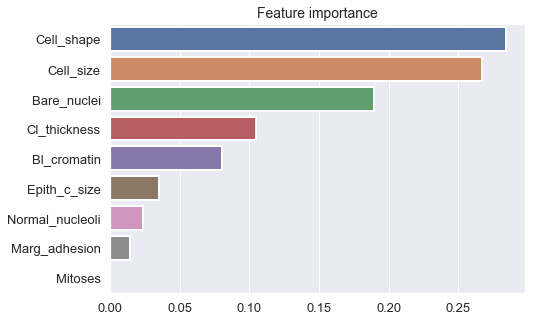

In [58]:
coef = pd.Series(rf_model_best.feature_importances_, index = X.columns)
imp_coef = coef.sort_values(ascending=False)

def plot_importance(feat_imp, feat_name):
    fig, ax = plt.subplots(figsize=(8,5)) 
    sns.set(style="darkgrid", context="poster")
    sns.barplot(feat_imp, feat_name, palette="deep")
    plt.title("Feature importance", fontsize=14)
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.tight_layout()
    
plot_importance(imp_coef.values, imp_coef.index)

# Deployment

In [59]:
joblib.dump(rf_model_best, 'model.pkl')

['model.pkl']